In [21]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [14]:
# Load the dataset
biomass_data = pd.read_csv('site_data.csv')

# Transpose the DataFrame to have products as rows and locations as columns
data_transposed = biomass_data.set_index(['dataset', 'site_name', 'site_id', 'X', 'Y']).T

# Remove non-numeric rows
data_transposed_numeric = data_transposed.select_dtypes(include=[np.number])

# Replace 'NA' with NaN
data_transposed_numeric = data_transposed_numeric.replace('NA', np.nan)

# Drop columns with all NaN values
data_transposed_numeric = data_transposed_numeric.dropna(axis=1, how='all')

# Impute missing values with column mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data_imputed = data_transposed_numeric.fillna(data_transposed_numeric.mean())

In [15]:
# Perform hierarchical clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed.T)

# You may need to adjust the number of clusters based on your data and analysis goals
# ‘ward’ minimizes the variance of the clusters being merged.
n_clusters = 5
cluster = KMeans(n_clusters=n_clusters)
clusters = cluster.fit_predict(data_scaled)

# Add cluster labels to the transposed DataFrame
data_transposed_numeric.loc['cluster'] = clusters

# Transpose the data back to the original format
biomass_data_clustered = data_transposed_numeric.T.reset_index()

In [16]:
# Save the clustering results to a CSV file
biomass_data_clustered.to_csv('clustering_product_kmeans5.csv', index=False)

In [17]:
# Convert the data to a DataFrame
df = pd.DataFrame(biomass_data_clustered)

# List of products
products = ['ESA CCI', 'Chopping et al.', 'GEDI L4B', 'Liu et al.', 'LT-GNN', 'Menlove & Healey', 'Xu et al.']

# Create a DataFrame for the heatmap data
heatmap_data = pd.DataFrame(index=products, columns=df['cluster'].unique())

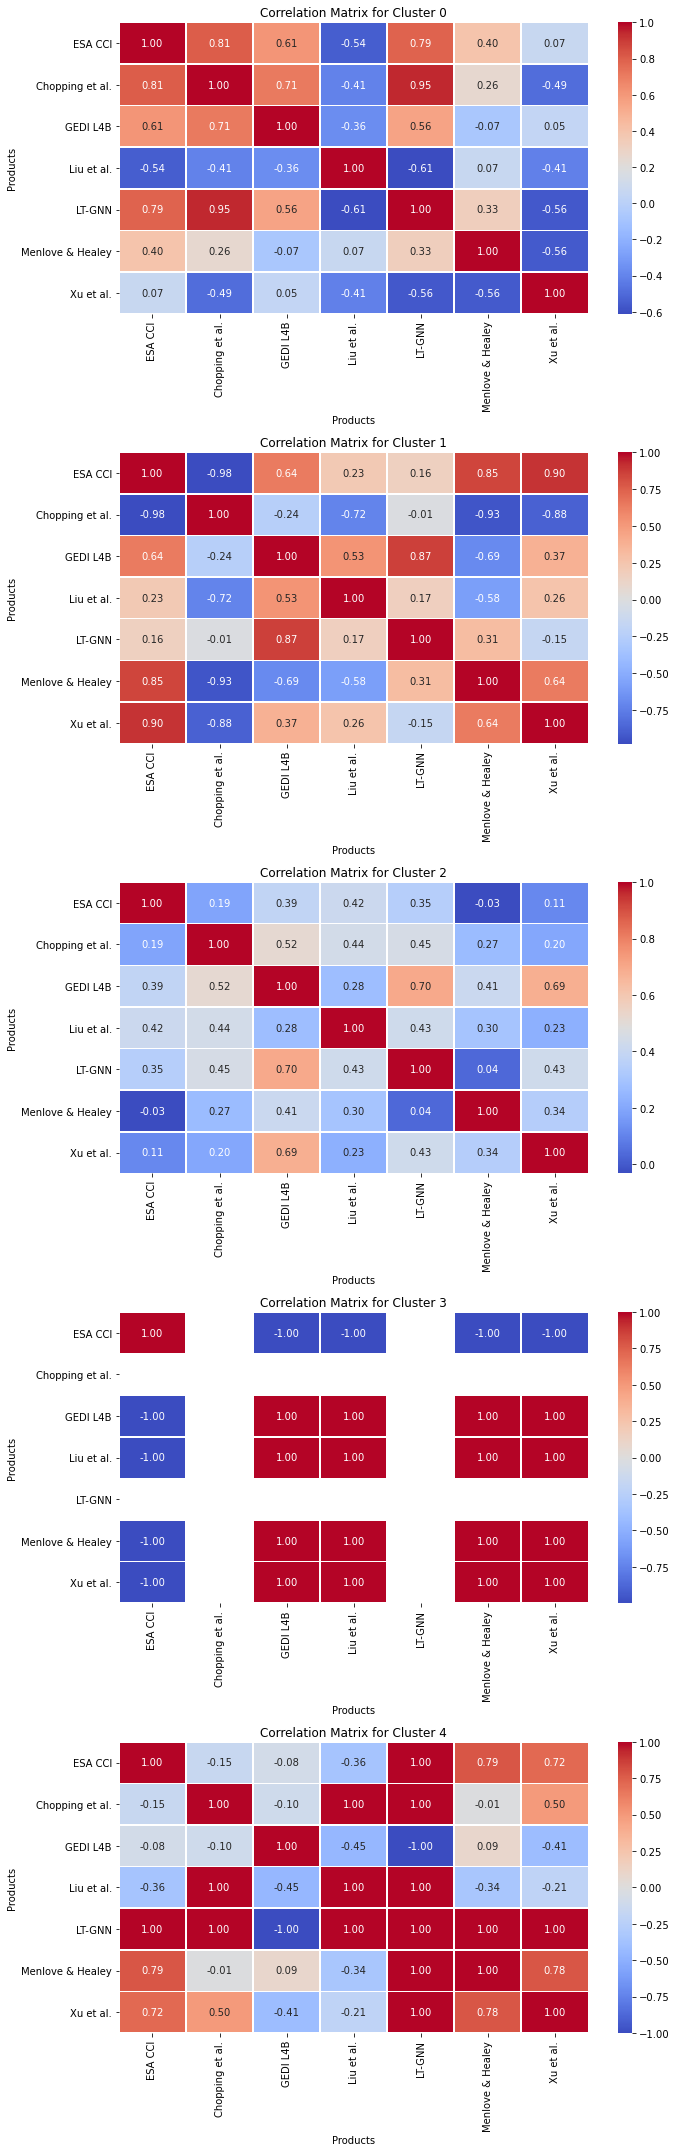

In [18]:
# Group data by cluster
grouped = df.groupby('cluster')

# Create subplots for each cluster
fig, axes = plt.subplots(len(grouped), 1, figsize=(10, 6 * len(grouped)))

# Calculate correlations and plot heatmaps for each cluster
for i, (cluster, data) in enumerate(grouped):
    corr_matrix = data[products].corr()
    sns.heatmap(corr_matrix, ax=axes[i], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
    axes[i].set_title(f'Correlation Matrix for Cluster {int(cluster)}')
    axes[i].set_xlabel('Products')
    axes[i].set_ylabel('Products')

plt.tight_layout()
plt.show()

In [23]:
# Perform hierarchical clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed.T)

# You may need to adjust the number of clusters based on your data and analysis goals
# ‘ward’ minimizes the variance of the clusters being merged.
# n_clusters = 5
cluster = AffinityPropagation(random_state=None)
clusters = cluster.fit_predict(data_scaled)

# Add cluster labels to the transposed DataFrame
data_transposed_numeric.loc['cluster'] = clusters

# Transpose the data back to the original format
biomass_data_clustered = data_transposed_numeric.T.reset_index()

# Save the clustering results to a CSV file
biomass_data_clustered.to_csv('clustering_product_kmeans5.csv', index=False)

In [24]:
# Convert the data to a DataFrame
df = pd.DataFrame(biomass_data_clustered)

# List of products
products = ['ESA CCI', 'Chopping et al.', 'GEDI L4B', 'Liu et al.', 'LT-GNN', 'Menlove & Healey', 'Xu et al.']

# Create a DataFrame for the heatmap data
heatmap_data = pd.DataFrame(index=products, columns=df['cluster'].unique())

C:\Users\aizax\anaconda3\lib\site-packages\seaborn\matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\aizax\anaconda3\lib\site-packages\seaborn\matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


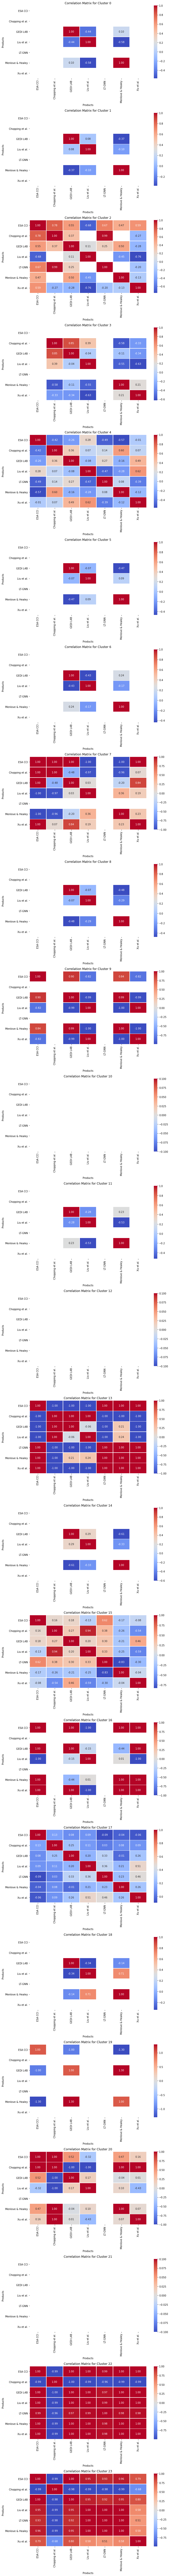

In [25]:
# Group data by cluster
grouped = df.groupby('cluster')

# Create subplots for each cluster
fig, axes = plt.subplots(len(grouped), 1, figsize=(10, 6 * len(grouped)))

# Calculate correlations and plot heatmaps for each cluster
for i, (cluster, data) in enumerate(grouped):
    corr_matrix = data[products].corr()
    sns.heatmap(corr_matrix, ax=axes[i], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
    axes[i].set_title(f'Correlation Matrix for Cluster {int(cluster)}')
    axes[i].set_xlabel('Products')
    axes[i].set_ylabel('Products')

plt.tight_layout()
plt.show()